## Load data


In [21]:
import graphlab

In [34]:
sales=graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

Finished parsing file C:\Users\mbal\Documents\All Backup Data\OneDrive\Documents\Training\Outside Adobe skills\Machine Learning\LinearRegression\Codes\Simple Regression\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.028074 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\mbal\Documents\All Backup Data\OneDrive\Documents\Training\Outside Adobe skills\Machine Learning\LinearRegression\Codes\Simple Regression\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.022059 secs.

In [35]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


## Explore the data

In [36]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot",x="CrimeRate",y="HousePrice")

## Fit the regression model using crime as the feature

In [37]:
crime_model=graphlab.regression.create(sales,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

## Check the fit


In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

## Remove center city and redo the analysis

In [41]:
sales_noCC=sales[sales['MilesPhila']!=0.0]

In [42]:
sales_noCC.show(view="Scatter Plot",x="CrimeRate",y="HousePrice")

## Relift our simple regression model on this modified dataset:

In [43]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

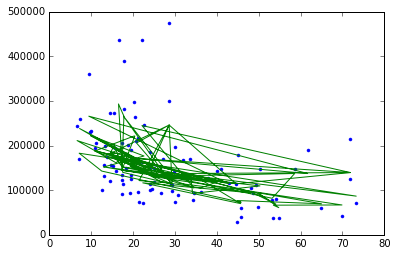

In [44]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model.predict(sales_noCC),'-')

## Compare coefficient for full datacity and removed centre city

In [45]:
crime_model.get('coefficients')

[ERROR] graphlab.toolkits._main: Toolkit error: Field 'coefficients' does not exist. Use list_fields() for a list of fields that can be queried.



ToolkitError: Field 'coefficients' does not exist. Use list_fields() for a list of fields that can be queried.


## Assignments- 1st
